<a href="https://colab.research.google.com/github/snjauregui/notebooks/blob/main/TP1_Properati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Library Imports

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#!ls

In [ ]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
!pip install --upgrade geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.6 MB/s 
     |████████████████████████████████| 16.6 MB 206 kB/s 
     |████████████████████████████████| 7.8 MB 65.4 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import re
import plotly.express as px
import geopandas as gpd


print("Setup Complete")



Setup Complete


## Load data

In [ ]:
#Acceso a google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Cargar el dataset
properatti_data_filepath = '/content/drive/MyDrive/Colab Notebooks/properatti.csv'
properatti_data = pd.read_csv(properatti_data_filepath)

#properatti_data = pd.read_csv('/content/properatti.csv')

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 75


properatti_data.head(5)

Unnamed: 0 operation property_type place_name  \
0           0      sell            PH  Mataderos   
1           1      sell     apartment   La Plata   
2           2      sell     apartment  Mataderos   
3           3      sell            PH    Liniers   
4           4      sell     apartment     Centro   

                                         place_with_parent_names country_name  \
0                          |Argentina|Capital Federal|Mataderos|    Argentina   
1                    |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|    Argentina   
2                          |Argentina|Capital Federal|Mataderos|    Argentina   
3                            |Argentina|Capital Federal|Liniers|    Argentina   
4  |Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|    Argentina   

                     state_name  geonames_id                  lat-lon  \
0               Capital Federal    3430787.0  -34.6618237,-58.5088387   
1        Bs.As. G.B.A. Zona Sur    3432039.0  -34.9038831,-57.9643295   
2               Capital Federal    3430787.0  -34.6522615,-58.5229825   
3               Capital Federal    3431333.0  -34.6477969,-58.5164244   
4  Buenos Aires Costa Atlántica    3435548.0  -38.0026256,-57.5494468   

         lat        lon     price currency  price_aprox_local_currency  \
0 -34.661824 -58.508839   62000.0      USD                   1093959.0   
1 -34.903883 -57.964330  150000.0      USD                   2646675.0   
2 -34.652262 -58.522982   72000.0      USD                   1270404.0   
3 -34.647797 -58.516424   95000.0      USD                   1676227.5   
4 -38.002626 -57.549447   64000.0      USD                   1129248.0   

   price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
0          62000.0                 55.0                   40.0   
1         150000.0                  NaN                    NaN   
2          72000.0                 55.0                   55.0   
3          95000.0                  NaN                    NaN   
4          64000.0                 35.0                   35.0   

   price_usd_per_m2  price_per_m2  floor  rooms  expenses  \
0       1127.272727   1550.000000    NaN    NaN       NaN   
1               NaN           NaN    NaN    NaN       NaN   
2       1309.090909   1309.090909    NaN    NaN       NaN   
3               NaN           NaN    NaN    NaN       NaN   
4       1828.571429   1828.571429    NaN    NaN       NaN   

                                                                properati_url  \
0  http://www.properati.com.ar/15bo8_venta_ph_mataderos_lavadero_patio_inm...   
1  http://www.properati.com.ar/15bob_venta_departamentos_la-plata_balcon_l...   
2  http://www.properati.com.ar/15bod_venta_departamentos_mataderos_lavader...   
3         http://www.properati.com.ar/15boh_venta_ph_liniers_patio_g-goffredo   
4  http://www.properati.com.ar/15bok_venta_departamentos_centro_cristina-p...   

                                                                  description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA...   
1  Venta de departamento en décimo piso al frente, a estrenar. Living come...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...   
3  PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....   
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL,  AL CONTRAFRENTE, EDIF...   

                                                        title  \
0                          2 AMB TIPO CASA SIN EXPENSAS EN PB   
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37                  
2                    2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   
3                                PH 3 amb. cfte. reciclado      
4         DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE   

                                                              image_thumbnail  
0  https://thumbs4.properati.com/8/BluUYiHJLhgIIKufMJMwHtquzhk=/trim/198x0...  
1  https://thumbs4.properati.c

In [ ]:
# Ver el nombre de las columnas
list(properatti_data.columns)

['Unnamed: 0',
 'operation',
 'property_type',
 'place_name',
 'place_with_parent_names',
 'country_name',
 'state_name',
 'geonames_id',
 'lat-lon',
 'lat',
 'lon',
 'price',
 'currency',
 'price_aprox_local_currency',
 'price_aprox_usd',
 'surface_total_in_m2',
 'surface_covered_in_m2',
 'price_usd_per_m2',
 'price_per_m2',
 'floor',
 'rooms',
 'expenses',
 'properati_url',
 'description',
 'title',
 'image_thumbnail']

In [ ]:
# Ver la cantidad de datos en cada columna
properatti_data.count()

Unnamed: 0                    121220
operation                     121220
property_type                 121220
place_name                    121197
place_with_parent_names       121220
country_name                  121220
state_name                    121220
geonames_id                   102503
lat-lon                        69670
lat                            69670
lon                            69670
price                         100810
currency                      100809
price_aprox_local_currency    100810
price_aprox_usd               100810
surface_total_in_m2            81892
surface_covered_in_m2         101313
price_usd_per_m2               68617
price_per_m2                   87658
floor                           7899
rooms                          47390
expenses                       14262
properati_url                 121220
description                   121218
title                         121220
image_thumbnail               118108
dtype: int64

## Explorar el dataset
Son 121220 filas y 26 columnas. 
Se encontraron los siguientes tipos de datos:
1. datos categoricos de operación, tipo de propiedad, país, provincia, ciudad y barrio, pero no para todas las observaciones
2. datos numéricos de precio, superficie, precio por m2, ambientes y piso, pero no para todas las observaciones.
3. datos de geolocalización, pero no para todas las observaciones
4. URL
5. Imágenes



In [ ]:
properatti_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

Variables Categoricas. Operaciones.

Tabla de frecuencias por tipo de operción.

Son todas ventas. Se puede eliminar.

In [ ]:
properatti_data["operation"].value_counts()
x = properatti_data.operation
counts = x.value_counts(dropna=False)
percent = x.value_counts(dropna=False, normalize=True)
percent100 = x.value_counts(dropna=False, normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'cantidad': counts, "porcentaje": percent100})

cantidad porcentaje
sell    121220     100.0%

Variables categóricas. 

Tabla de frecuencia por tipo de propiedades

In [ ]:
prop_table = properatti_data.groupby(['property_type']).agg({'property_type': ['count']})
prop_table.comluns = ['count']
prop_table = prop_table.reset_index()
prop_table.columns = ["tipo de propiedad", "cantidad"]
print(prop_table)

# Traduzco las categorías
prop_table["tipo de propiedad"]= prop_table["tipo de propiedad"].astype("category")
prop_table["tipo de propiedad"] = prop_table["tipo de propiedad"].cat.rename_categories({'apartment': "departamento", 'house': "casa", 
    'PH': "PH", 'store': "local comercial"})

# Armo el Pie chart
df=prop_table
fig = px.pie(df, values='cantidad', names= "tipo de propiedad",
 title="Anuncios según tipo de propiedad (n:121.220)")
fig.update_layout(legend=dict(title="Tipo de Propiedad", orientation="v", y=0.4, yanchor="bottom", x=0.2, xanchor="right"))
fig.show()

<ipython-input-10-07563378dba4>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  prop_table.comluns = ['count']


  tipo de propiedad  cantidad
0                PH      5751
1         apartment     71065
2             house     40268
3             store      4136


Variables categóricas. State_name.

In [ ]:
#Tabla de frecuencia de operaciones por provincia
properatti_data["state_name"].value_counts()
x = properatti_data.state_name
counts = x.value_counts(dropna=False)
percent = x.value_counts(dropna=False, normalize=True)
percent100 = x.value_counts(dropna=False, normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'cantidad': counts, "porcentaje": percent100})

cantidad porcentaje
Capital Federal                  32316      26.7%
Bs.As. G.B.A. Zona Norte         25560      21.1%
Bs.As. G.B.A. Zona Sur           13952      11.5%
Córdoba                          12069      10.0%
Santa Fe                         10172       8.4%
Buenos Aires Costa Atlántica     10006       8.3%
Bs.As. G.B.A. Zona Oeste          9322       7.7%
Buenos Aires Interior             2291       1.9%
Río Negro                          808       0.7%
Neuquén                            733       0.6%
Mendoza                            681       0.6%
Tucumán                            674       0.6%
Corrientes                         583       0.5%
Misiones                           464       0.4%
Entre Ríos                         369       0.3%
Salta                              278       0.2%
Chubut                             259       0.2%
San Luis                           252       0.2%
La Pampa                           157       0.1%
Formosa                             65       0.1%
Chaco                               57       0.0%
San Juan                            40       0.0%
Tierra Del Fuego                    31       0.0%
Catamarca                           27       0.0%
Jujuy                               26       0.0%
Santa Cruz                          20       0.0%
Santiago Del Estero                  4       0.0%
La Rioja                             4       0.0%

In [ ]:
#Recategorizar state_name pasando las provincias con menos de 500 propiedades a categoría "Otros"
properatti_data["state_name2"] = properatti_data["state_name"]
properatti_data.loc[properatti_data.groupby('state_name2')['state_name2'].transform('size')<500, 'state_name2'] = 'Otros'

In [ ]:
#Nueva tabla de frecuencia con categoría "otros"
properatti_data["state_name2"].value_counts()
x = properatti_data.state_name2
counts = x.value_counts(dropna=False)
percent = x.value_counts(dropna=False, normalize=True)
percent100 = x.value_counts(dropna=False, normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'cantidad': counts, "porcentaje": percent100})

cantidad porcentaje
Capital Federal                  32316      26.7%
Bs.As. G.B.A. Zona Norte         25560      21.1%
Bs.As. G.B.A. Zona Sur           13952      11.5%
Córdoba                          12069      10.0%
Santa Fe                         10172       8.4%
Buenos Aires Costa Atlántica     10006       8.3%
Bs.As. G.B.A. Zona Oeste          9322       7.7%
Buenos Aires Interior             2291       1.9%
Otros                             2053       1.7%
Río Negro                          808       0.7%
Neuquén                            733       0.6%
Mendoza                            681       0.6%
Tucumán                            674       0.6%
Corrientes                         583       0.5%

In [ ]:
#Creamos una variable "tipo de propiedad" que es igual "property_type" traducida al español para los gráficos
properatti_data["tipo de propiedad"]= properatti_data["property_type"].astype("category")
properatti_data["tipo de propiedad"] = properatti_data["tipo de propiedad"].cat.rename_categories({'apartment': "departamento", 'house': "casa", 
    'PH': "PH", 'store': "local comercial"})

#Tabla de tipo de propiedad por provincia
table_xprov = properatti_data.groupby(['state_name2', 'tipo de propiedad']).agg({'tipo de propiedad': ['count']})
#properatti_datag
table_xprov.comluns = ['count']
table_xprov = table_xprov.reset_index()
table_xprov.columns = ["zona", "tipo de propiedad", "cantidad"]
print(table_xprov)
print(table_xprov.columns)

                            zona tipo de propiedad  cantidad
0       Bs.As. G.B.A. Zona Norte                PH       985
1       Bs.As. G.B.A. Zona Norte      departamento     10622
2       Bs.As. G.B.A. Zona Norte              casa     13364
3       Bs.As. G.B.A. Zona Norte   local comercial       589
4       Bs.As. G.B.A. Zona Oeste                PH       789
5       Bs.As. G.B.A. Zona Oeste      departamento      3618
6       Bs.As. G.B.A. Zona Oeste              casa      4663
7       Bs.As. G.B.A. Zona Oeste   local comercial       252
8         Bs.As. G.B.A. Zona Sur                PH       821
9         Bs.As. G.B.A. Zona Sur      departamento      5507
10        Bs.As. G.B.A. Zona Sur              casa      6985
11        Bs.As. G.B.A. Zona Sur   local comercial       639
12  Buenos Aires Costa Atlántica                PH       575
13  Buenos Aires Costa Atlántica      departamento      6461
14  Buenos Aires Costa Atlántica              casa      2685
15  Buenos Aires Costa A

<ipython-input-14-756b3d97d4c7>:9: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
#Gráfico de barras apiladas de propiedades por provincia y según tipo
print(properatti_data.shape) #Para saber la cantidad de filas (observaciones) en el gráfico
fig = px.histogram(table_xprov, x="zona", y="cantidad", color="tipo de propiedad",
            width=800, height=600,
            labels={ # replaces default labels by column name
                "zona": "Zona", "tipo de propiedad": "Tipo de Propiedad", "cantidad": "Cantidad"},
            category_orders={"tipo de propiedad": ["departamento", "casa", "PH", "local comercial"]},
            template="simple_white")
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'}, 
                    title="Cantidad de anuncios segun zona y tipo de propiedad. n=121220",
                    xaxis_title="Zona",
                    yaxis_title="Cantidad de anuncios",
                    legend=dict(title="Tipo de Propiedad", orientation="v", y=0.7, yanchor="bottom", x=0.7, xanchor="left"))
fig.show()

(121220, 28)


In [ ]:
#Grafico de caja de precios en usd por tipo de propiedad

import plotly.express as px
df=properatti_data[(properatti_data.price_aprox_usd < properatti_data.price_aprox_usd.quantile(.95))]
print(df.shape) #Para saber la cantidad de observaciones que quedaron después de seleccionar el cuantil 95.
fig = px.box(df, x="tipo de propiedad", y="price_aprox_usd", points="all", color="tipo de propiedad")
fig.update_layout(title="Distribución de precios según tipo de propiedad. n=95721",
                    xaxis_title="Tipo de Propiedad",
                    yaxis_title="Precios en USD")
fig.show()

(95721, 28)


In [ ]:
#Gráfico de caja de precios por zona geográfica
import plotly.express as px
df=properatti_data[(properatti_data.price_aprox_usd < properatti_data.price_aprox_usd.quantile(.95))]
print(df.shape) #Para saber la cantidad de observaciones que quedaron después de seleccionar el cuantil 95.
fig = px.box(df, x="state_name2", y="price_aprox_usd", points="all")
fig.update_layout(title="Distribución de precios según zona. n=95721",
                    xaxis_title="Zona",
                    yaxis_title="Precios en USD")
fig.show()

(95721, 28)


Variables numéricas. Precios.

In [ ]:
# Medidas de tendencia central de las variables de precio 

import numpy as np
# print(properatti_data.select_dtypes(include=np.number).columns)
precios= properatti_data[["price", "price_aprox_usd", "price_aprox_local_currency", "price_usd_per_m2", "price_per_m2"]]
precios.describe().apply(lambda s: s.apply('{0:.2f}'.format))

price price_aprox_usd price_aprox_local_currency  \
count     100810.00       100810.00                  100810.00   
mean      468525.93       239700.58                 4229396.83   
std      2260100.59       391323.88                 6904714.13   
min            0.00            0.00                       0.00   
25%       110000.00        89733.88                 1583309.44   
50%       185000.00       145000.00                 2558452.50   
75%       420000.00       265000.00                 4675792.50   
max    650000000.00     46545445.00               821271104.30   

      price_usd_per_m2 price_per_m2  
count         68617.00     87658.00  
mean           2160.09      6912.22  
std            2759.29     28378.64  
min               0.60         1.51  
25%            1218.18      1550.00  
50%            1800.00      2213.11  
75%            2486.41      3355.55  
max          206333.33   3999999.96

(91412, 4)


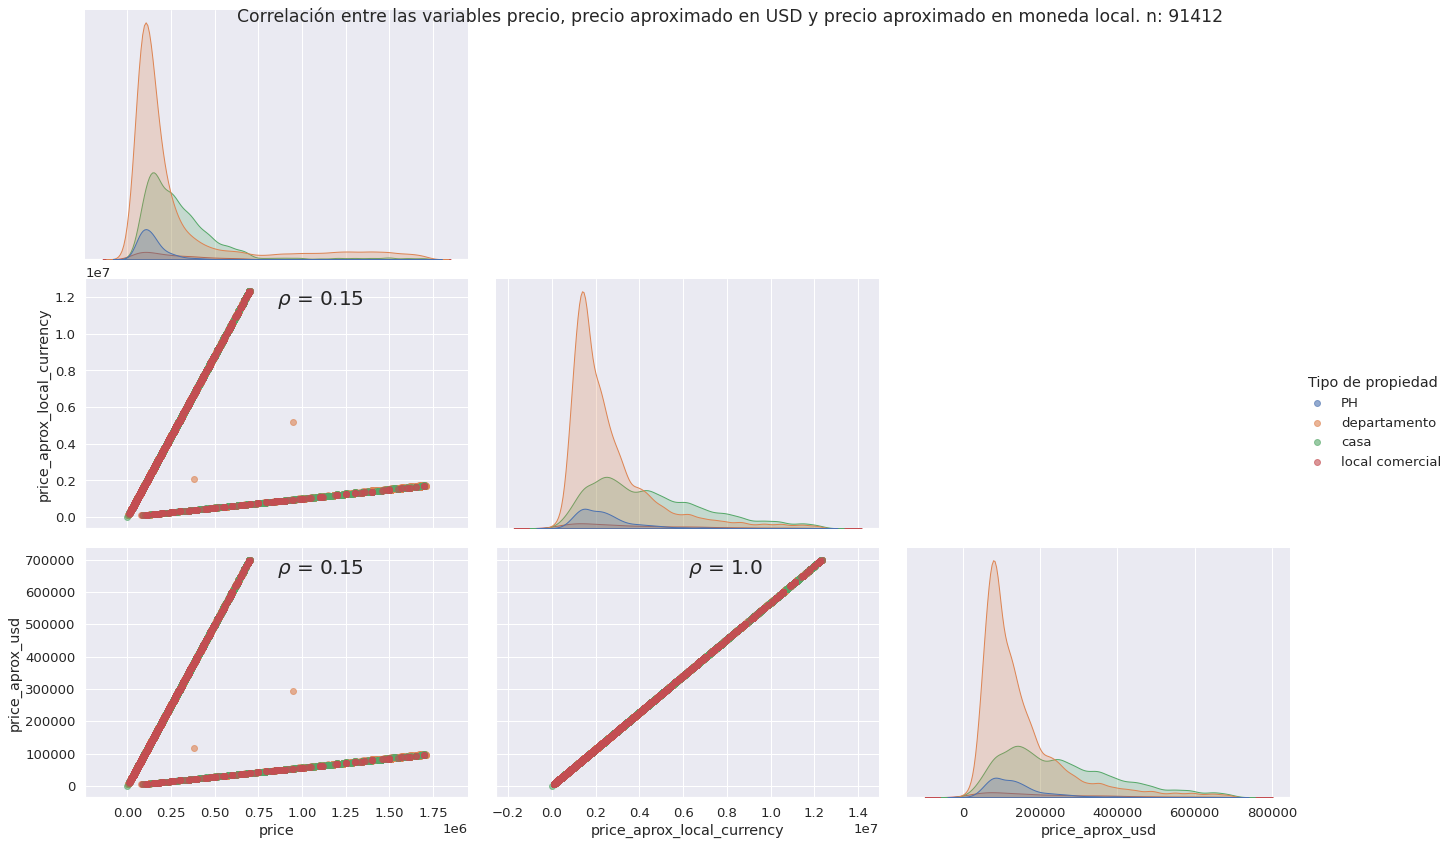

In [ ]:
# Gráfico de correlaciones entre columnas de precios
import seaborn as sns
from scipy import stats

# Eliminar casos sobre cuantil 95
df= properatti_data[["price", "price_aprox_local_currency", "price_aprox_usd", "tipo de propiedad"]]
df=df[(df.price< df.price.quantile(.95)) 
    & (df.price_aprox_local_currency< df.price_aprox_local_currency.quantile(.95)) 
    & (df.price_aprox_usd< df.price_aprox_usd.quantile(.95)) ]
print(df.shape) #Quedaron 91412 observaciones.

# Graficos de correlación entre variables de precio
from scipy.stats import pearsonr
def corr(x, y, hue=None, **kwargs):
    # Calcular coeficiente
    coef = np.corrcoef(x, y)[0][1]
    # hacer etiqueta
    label = r'$\rho$ = ' + str(round(coef, 2))
    # agregar etiqueta al gráfico
    ax = plt.gca()
    ax.annotate(label, xy = (0.5, 0.90), size = 20, xycoords = ax.transAxes)
    
sns.set_theme(style="ticks")
sns.set(font_scale=1.2)
g=sns.PairGrid(df, hue="tipo de propiedad", height=4, aspect=1.5, diag_sharey = False, corner = True)
g.fig.suptitle('Correlación entre las variables precio, precio aproximado en USD y precio aproximado en moneda local. n: 91412')
g.map_lower(plt.scatter, alpha = 0.6)
g.map_diag(sns.kdeplot, shade=True)
g.map_lower(corr, hue=None)
g.add_legend(title="Tipo de propiedad")


. "price" combina precios en dolares y precios en moneda local.

. "precio en moneda local" es igual a "precio en usd" por 17,644.

. Conviene usar "precio en USD"

Variables numéricas. Superficie total y superficie cubierta

In [ ]:
#Graficar relacion entre superficie total y superficie cubierta
df=properatti_data[(properatti_data.surface_total_in_m2.between(1, 1000)) & (properatti_data.surface_covered_in_m2.between(1,1000)) ]
print(df.shape) #Para saber cantidad de observaciones que quedaron después de quitar los outliers.

import plotly.express as px
fig = px.scatter(x= df.surface_total_in_m2, y=df.surface_covered_in_m2 , facet_col= df.property_type, opacity=0.5,
    labels={ # replaces default labels by column name
                "tipo de propiedad": "Tipo de Propiedad"},
            category_orders={"tipo de propiedad": ["departamento", "casa", "PH", "local comercial"]},
            template="simple_white")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_layout(title="Distribución de superficie total y superficia cubierta. n=72463.500",
                    xaxis_title="Superficie total",
                    yaxis_title="Superficie cubierta")
fig.show()

(72463, 28)


En terminos generales la superficie total es igual o mayor a la superficie cubierta. 

Variables numéricas. Precio por metro cuadrado

In [ ]:
####Comparar columnas de precios por m2
preciosm2 = properatti_data[["price_per_m2", 'price_usd_per_m2']]
preciosm2.round(2)
preciosm2clean=preciosm2.dropna()
preciosm2clean.describe().apply(lambda s: s.apply('{0:.2f}'.format))

price_per_m2 price_usd_per_m2
count     63350.00         63350.00
mean       6600.02          2192.25
std       14963.20          2846.35
min           1.51             0.60
25%        1606.56          1225.71
50%        2306.67          1818.18
75%        3420.17          2500.00
max      692046.00        206333.33

In [ ]:
# Quito outliers de precios muy altos para que se vea mejor la relación
df=properatti_data[(properatti_data.price_per_m2.between(1,100000)) & (properatti_data.price_usd_per_m2.between(1,50000))]
print(df.shape)

# Gráfico 
import plotly.express as px
fig = px.scatter(x= df.price_per_m2 , y=df.price_usd_per_m2, opacity=0.2, width= 900, height=450)
fig.update_layout(title="Distribución de precios del m2 en USD y en moneda local. n=63.273",
                    xaxis_title="Precio por m2 en ARS",
                    yaxis_title="Precios por m2 en USD")
fig.show()

(63272, 28)


Pareciera que hay dos tipos de cambio distintos o los datos son inconsistentes

Correlaciones entre precio del m2 y superficie

In [ ]:
# Armar subset y quitar outliers
list(properatti_data.columns)
df=properatti_data[['price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',  'price_per_m2', 'property_type']]
df=df.dropna()
df=round(df, 0)
print(df.shape)

df1= df[(np.abs(stats.zscore(df.select_dtypes(include=np.number))) < 3).all(axis=1)] #Quitar outliers más allá de los 3 desvíos estándar
df1.head()

(63350, 7)


price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
0                   1093959.0          62000.0                 55.0   
2                   1270404.0          72000.0                 55.0   
4                   1129248.0          64000.0                 35.0   
6                   2293785.0         130000.0                106.0   
7                   2434941.0         138000.0                 45.0   

   surface_covered_in_m2  price_usd_per_m2  price_per_m2 property_type  
0                   40.0            1127.0        1550.0            PH  
2                   55.0            1309.0        1309.0     apartment  
4                   35.0            1829.0        1829.0     apartment  
6                   78.0            1226.0        1667.0            PH  
7                   40.0            3067.0        3450.0     apartment

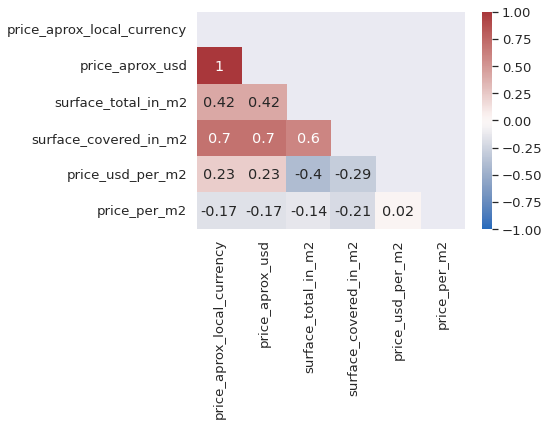

In [ ]:
# Calcular matriz de correlaciones
matrix = df1.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

Las variables de precio "precio en usd" y "precio aproximado en moneda local" correlacionan positivamente con "superficie cubirta" (0.7) y con superficie total (0.42). La correlación es positivia. A mayor superficie, mayor precio en moneda local. 

# Checks


##  Column values

In [ ]:
operation = properatti_data['operation'].unique()
print(operation)

['sell']


In [ ]:
property_type = properatti_data['property_type'].unique()
print(property_type)

['PH' 'apartment' 'house' 'store']


In [ ]:
country_name = properatti_data['country_name'].unique()
print(country_name)

['Argentina']


In [ ]:
state_name = properatti_data['state_name'].unique()
print(state_name)

['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Buenos Aires Costa Atlántica'
 'Entre Ríos' 'Bs.As. G.B.A. Zona Norte' 'Santa Fe' 'Córdoba'
 'Bs.As. G.B.A. Zona Oeste' 'Misiones' 'Buenos Aires Interior' 'Salta'
 'Neuquén' 'Río Negro' 'San Luis' 'Mendoza' 'Corrientes' 'Chubut'
 'Tucumán' 'La Pampa' 'Chaco' 'San Juan' 'Santa Cruz' 'Tierra Del Fuego'
 'Catamarca' 'Santiago Del Estero' 'Jujuy' 'La Rioja' 'Formosa']


In [ ]:
currency = properatti_data['currency'].unique()
print(currency)

['USD' nan 'ARS' 'PEN' 'UYU']


## null Check

In [ ]:
percent_missing = round(properatti_data.isnull().sum() * 100 / len(properatti_data),2)
missing_value_df = pd.DataFrame({'column_name': properatti_data.columns,
                                 'percent_missing': percent_missing})
missing_value_df


column_name  percent_missing
Unnamed: 0                                  Unnamed: 0             0.00
operation                                    operation             0.00
property_type                            property_type             0.00
place_name                                  place_name             0.02
place_with_parent_names        place_with_parent_names             0.00
country_name                              country_name             0.00
state_name                                  state_name             0.00
geonames_id                                geonames_id            16.01
lat-lon                                        lat-lon            40.52
lat                                                lat            40.52
lon                                                lon            40.52
price                                            price            15.28
currency                                      currency            15.28
price_aprox_local_currency  price_aprox_local_currency            15.28
price_aprox_usd                        price_aprox_usd            15.28
surface_total_in_m2                surface_total_in_m2            34.13
surface_covered_in_m2            surface_covered_in_m2            16.71
price_usd_per_m2                      price_usd_per_m2            43.37
price_per_m2                              price_per_m2            26.71
floor                                            floor            94.18
rooms                                            rooms            60.00
expenses                                      expenses            87.32
properati_url                            properati_url             0.00
description                                description             0.00
title                                            title             0.00
image_thumbnail                        image_thumbnail             2.07
state_name2                                state_name2             0.00
tipo de propiedad                    tipo de propiedad             0.00
flg_null_price                          flg_null_price             0.00
flg_null_sup                              flg_null_sup             0.00
ambientes                                    ambientes            68.68

### Chequeamos los registros que son nulos en price_aprox_usd

Text(0, 0.5, '% de propiedades')

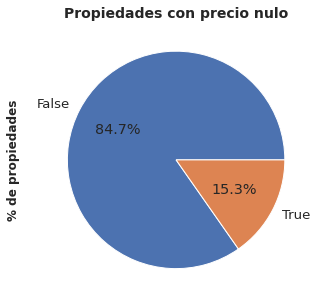

In [ ]:
properatti_data_check_null = properatti_data
properatti_data_check_null['flg_null_price'] = properatti_data.price_aprox_usd.isnull()


properatti_data_check_null = properatti_data_check_null.groupby('flg_null_price')['title'].count()

plt = properatti_data_check_null.plot.pie(y="flg_null_price", figsize=(14, 5), autopct='%1.1f%%')

plt.set_title("Propiedades con precio nulo", weight='bold', size=14)
plt.set_ylabel("% de propiedades", labelpad=20, weight='bold', size=12)

### Chequeamos los registros que son nulos superficie

In [ ]:
properatti_data_nulls_sup = properatti_data[properatti_data.surface_total_in_m2.isnull()]
properatti_data_nulls_sup.head(5)


Unnamed: 0 operation property_type  place_name  \
1            1      sell     apartment    La Plata   
3            3      sell            PH     Liniers   
9            9      sell         house     Rosario   
11          11      sell         house  San Miguel   
65          65      sell         store  San Martín   

                                               place_with_parent_names  \
1                          |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|   
3                                  |Argentina|Capital Federal|Liniers|   
9                                         |Argentina|Santa Fe|Rosario|   
11                     |Argentina|Bs.As. G.B.A. Zona Norte|San Miguel|   
65  |Argentina|Bs.As. G.B.A. Zona Norte|General San Martín|San Martín|   

   country_name                state_name  geonames_id  \
1     Argentina    Bs.As. G.B.A. Zona Sur    3432039.0   
3     Argentina           Capital Federal    3431333.0   
9     Argentina                  Santa Fe    3838574.0   
11    Argentina  Bs.As. G.B.A. Zona Norte          NaN   
65    Argentina  Bs.As. G.B.A. Zona Norte          NaN   

                    lat-lon        lat        lon     price currency  \
1   -34.9038831,-57.9643295 -34.903883 -57.964330  150000.0      USD   
3   -34.6477969,-58.5164244 -34.647797 -58.516424   95000.0      USD   
9    -32.942031,-60.7259192 -32.942031 -60.725919  460000.0      ARS   
11  -34.5390571,-58.7196093 -34.539057 -58.719609  150000.0      USD   
65  -34.5308356,-58.5669559 -34.530836 -58.566956   50000.0      USD   

    price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
1                   2646675.00        150000.00                  NaN   
3                   1676227.50         95000.00                  NaN   
9                    455201.45         25798.49                  NaN   
11                  2646675.00        150000.00                  NaN   
65                   882225.00         50000.00                  NaN   

    surface_covered_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
1                     NaN               NaN           NaN    NaN    NaN   
3                     NaN               NaN           NaN    NaN    NaN   
9                     NaN               NaN           NaN    NaN    NaN   
11                    NaN               NaN           NaN    NaN    NaN   
65                    NaN               NaN           NaN    NaN    NaN   

    expenses  \
1        NaN   
3        NaN   
9        NaN   
11       NaN   
65       NaN   

                                                                 properati_url  \
1   http://www.properati.com.ar/15bob_venta_departamentos_la-plata_balcon_l...   
3          http://www.properati.com.ar/15boh_venta_ph_liniers_patio_g-goffredo   
9   http://www.properati.com.ar/15box_venta_casa_rosario_patio_administraci...   
11  http://www.properati.com.ar/15bp0_venta_casa_san-miguel_jardin_lavadero...   
65  http://www.properati.com.ar/15bwq_venta_local_san-martin_terraza_spolit...   

                                                                   description  \
1   Venta de departamento en décimo piso al frente, a estrenar. Living come...   
3   PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....   
9   MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWHITE 7637 SECTOR E MONOBLO...   
11  Entrada de Coche, Jardin, Living en desnivel, Comedor, Cocina, Toillete...   
65  CODIGO: 1092-VENTA 6886 ubicado en: COMBET 6886 -  Publicado por: SPOLI...   

                                                         title  \
1   VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37                  
3                                 PH 3 amb. cfte. reciclado      
9                   WHITE 7637 - 2 DORMITORIOS CON PATIO         
11                                                     CHALET    
65                                    LOCAL COMERCIAL CON BAÑO   

                                                               image_thumbnail  \
1   ht

Text(0, 0.5, '% de propiedades')

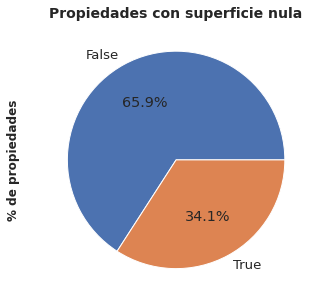

In [ ]:
properatti_data_check_null = properatti_data
properatti_data_check_null['flg_null_sup'] = properatti_data.surface_total_in_m2.isnull()


properatti_data_check_null = properatti_data_check_null.groupby('flg_null_sup')['title'].count()

plt = properatti_data_check_null.plot.pie(y="flg_null_sup", figsize=(14, 5), autopct='%1.1f%%')

plt.set_title("Propiedades con superficie nula", weight='bold', size=14)
plt.set_ylabel("% de propiedades", labelpad=20, weight='bold', size=12)

In [ ]:
percent_missing = round(properatti_data_nulls_sup.isnull().sum() * 100 / len(properatti_data_nulls_sup),2)
missing_value_df = pd.DataFrame({'column_name': properatti_data_nulls_sup.columns,
                                 'percent_missing': percent_missing})
missing_value_df


column_name  percent_missing
Unnamed: 0                                  Unnamed: 0             0.00
operation                                    operation             0.00
property_type                            property_type             0.00
place_name                                  place_name             0.01
place_with_parent_names        place_with_parent_names             0.00
country_name                              country_name             0.00
state_name                                  state_name             0.00
geonames_id                                geonames_id            14.58
lat-lon                                        lat-lon            40.77
lat                                                lat            40.77
lon                                                lon            40.77
price                                            price            18.39
currency                                      currency            18.39
price_aprox_local_currency  price_aprox_local_currency            18.39
price_aprox_usd                        price_aprox_usd            18.39
surface_total_in_m2                surface_total_in_m2           100.00
surface_covered_in_m2            surface_covered_in_m2            31.90
price_usd_per_m2                      price_usd_per_m2           100.00
price_per_m2                              price_per_m2            38.06
floor                                            floor            91.25
rooms                                            rooms            55.60
expenses                                      expenses            93.48
properati_url                            properati_url             0.00
description                                description             0.00
title                                            title             0.00
image_thumbnail                        image_thumbnail             3.30
state_name2                                state_name2             0.00
tipo de propiedad                    tipo de propiedad             0.00
flg_null_price                          flg_null_price             0.00
flg_null_sup                              flg_null_sup             0.00
ambientes                                    ambientes            71.40

Podemos ver que los registros con superficie en nulo tienen completos los campos de tipo de propiedad y ubicación. Podemos ver de hacer alguna imputación para no perder esa información.

## Cantidad de ambientes

In [ ]:
properatti_data_amb = properatti_data[properatti_data.title.str.contains("amb", case=False)]
properatti_data_amb.head()


Unnamed: 0 operation property_type place_name  \
0           0      sell            PH  Mataderos   
2           2      sell     apartment  Mataderos   
3           3      sell            PH    Liniers   
4           4      sell     apartment     Centro   
7           7      sell     apartment   Belgrano   

                                         place_with_parent_names country_name  \
0                          |Argentina|Capital Federal|Mataderos|    Argentina   
2                          |Argentina|Capital Federal|Mataderos|    Argentina   
3                            |Argentina|Capital Federal|Liniers|    Argentina   
4  |Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|    Argentina   
7                           |Argentina|Capital Federal|Belgrano|    Argentina   

                     state_name  geonames_id                  lat-lon  \
0               Capital Federal    3430787.0  -34.6618237,-58.5088387   
2               Capital Federal    3430787.0  -34.6522615,-58.5229825   
3               Capital Federal    3431333.0  -34.6477969,-58.5164244   
4  Buenos Aires Costa Atlántica    3435548.0  -38.0026256,-57.5494468   
7               Capital Federal    3436077.0   -34.5598729,-58.443362   

         lat        lon     price currency  price_aprox_local_currency  \
0 -34.661824 -58.508839   62000.0      USD                   1093959.0   
2 -34.652262 -58.522982   72000.0      USD                   1270404.0   
3 -34.647797 -58.516424   95000.0      USD                   1676227.5   
4 -38.002626 -57.549447   64000.0      USD                   1129248.0   
7 -34.559873 -58.443362  138000.0      USD                   2434941.0   

   price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
0          62000.0                 55.0                   40.0   
2          72000.0                 55.0                   55.0   
3          95000.0                  NaN                    NaN   
4          64000.0                 35.0                   35.0   
7         138000.0                 45.0                   40.0   

   price_usd_per_m2  price_per_m2  floor  rooms  expenses  \
0       1127.272727   1550.000000    NaN    NaN       NaN   
2       1309.090909   1309.090909    NaN    NaN       NaN   
3               NaN           NaN    NaN    NaN       NaN   
4       1828.571429   1828.571429    NaN    NaN       NaN   
7       3066.666667   3450.000000    NaN    NaN       NaN   

                                                                properati_url  \
0  http://www.properati.com.ar/15bo8_venta_ph_mataderos_lavadero_patio_inm...   
2  http://www.properati.com.ar/15bod_venta_departamentos_mataderos_lavader...   
3         http://www.properati.com.ar/15boh_venta_ph_liniers_patio_g-goffredo   
4  http://www.properati.com.ar/15bok_venta_departamentos_centro_cristina-p...   
7  http://www.properati.com.ar/15bot_venta_departamentos_belgrano_lavadero...   

                                                                  description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...   
3  PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....   
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL,  AL CONTRAFRENTE, EDIF...   
7  EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER LUMINOSO ...PISO ALTO CO...   

                                                          title  \
0                            2 AMB TIPO CASA SIN EXPENSAS EN PB   
2                      2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   
3                                  PH 3 amb. cfte. reciclado      
4           DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE   
7  JOSE HERNANDEZ 1400 MONOAMBIENTE  ESTRENAR CATEGORIA , VENTA   

                                                              image_thumbnail  \
0  https://thumbs4.properati.com/8/BluUYiHJLhgIIKufMJMwHtquzhk=/trim/198x0...   
2  https://thumb

In [ ]:
properatti_data_regex = properatti_data
properatti_data_regex['ambientes'] = properatti_data.description.str.extract('([0-9]*) amb')

In [ ]:
properatti_data_regex[properatti_data_regex['ambientes'].notnull()]

Unnamed: 0 operation property_type      place_name  \
3                3      sell            PH         Liniers   
11              11      sell         house      San Miguel   
13              13      sell     apartment    Palermo Soho   
16              16      sell            PH       Mataderos   
17              17      sell     apartment  Barrio El Golf   
...            ...       ...           ...             ...   
121129      121129      sell     apartment         Córdoba   
121131      121131      sell     apartment        Recoleta   
121139      121139      sell     apartment   Punta Iglesia   
121160      121160      sell     apartment        Belgrano   
121211      121211      sell     apartment        Acassuso   

                                                     place_with_parent_names  \
3                                        |Argentina|Capital Federal|Liniers|   
11                           |Argentina|Bs.As. G.B.A. Zona Norte|San Miguel|   
13                          |Argentina|Capital Federal|Palermo|Palermo Soho|   
16                                     |Argentina|Capital Federal|Mataderos|   
17        |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|Barrio El Golf|   
...                                                                      ...   
121129                                                   |Argentina|Córdoba|   
121131                                  |Argentina|Capital Federal|Recoleta|   
121139  |Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Punta Iglesia|   
121160                                  |Argentina|Capital Federal|Belgrano|   
121211              |Argentina|Bs.As. G.B.A. Zona Norte|San Isidro|Acassuso|   

       country_name                    state_name  geonames_id  \
3         Argentina               Capital Federal    3431333.0   
11        Argentina      Bs.As. G.B.A. Zona Norte          NaN   
13        Argentina               Capital Federal    3430234.0   
16        Argentina               Capital Federal    3430787.0   
17        Argentina      Bs.As. G.B.A. Zona Norte          NaN   
...             ...                           ...          ...   
121129    Argentina                       Córdoba    3860255.0   
121131    Argentina               Capital Federal    3429595.0   
121139    Argentina  Buenos Aires Costa Atlántica          NaN   
121160    Argentina               Capital Federal    3436077.0   
121211    Argentina      Bs.As. G.B.A. Zona Norte    3436508.0   

                              lat-lon        lat        lon     price  \
3             -34.6477969,-58.5164244 -34.647797 -58.516424   95000.0   
11            -34.5390571,-58.7196093 -34.539057 -58.719609  150000.0   
13                                NaN        NaN        NaN  111700.0   
16      -34.6523561177,-58.5016239381 -34.652356 -58.501624  239000.0   
17      -34.4087174767,-58.6343892841 -34.408717 -58.634389  315000.0   
...                               ...        ...        ...       ...   
121129                            NaN        NaN        NaN       NaN   
121131  -34.5906282762,-58.3975392609 -34.590628 -58.397539  325000.0   
121139                            NaN        NaN        NaN   80523.0   
121160   -34.563685346,-58.4426825896 -34.563685 -58.442683  410000.0   
121211                            NaN        NaN        NaN       NaN   

       currency  price_aprox_local_currency  price_aprox_usd  \
3           USD                  1676227.50          95000.0   
11          USD                  2646675.00         150000.0   
13          USD                  1970890.65         111700.0   
16          USD                  4217035.50         239000.0   
17          USD                  5558017.50         315000.0   
...         ...                         ...              ...   
121129      NaN                         NaN              NaN   
121131      USD                  5734462.50         325000.0   
121139      USD                  1420788.07          805

In [ ]:
properatti_data_regex['ambientes'].unique()

array([nan, '3', '1', '4', '', '2', '5', '6', '415', '50', '7', '40',
       '20', '90', '042', '8', '25', '23', '103', '297', '42026', '072',
       '18', '11', '0002', '9', '442', '24', '22330489662', '10', '9502',
       '20192', '22', '33', '42004', '151', '412', '42021', '42015',
       '733', '14', '183', '006', '20171', '20172', '20173', '853', '173',
       '162', '17', '0001', '2004', '562', '42054', '293', '872', '42024'],
      dtype=object)

Podemos ver que la regex nos trae valores inconsistentes para la columna de "ambientes", por lo cual decidimos no incorporarla al dataset final.

## Duplicados

In [ ]:
list(properatti_data.columns)

['Unnamed: 0',
 'operation',
 'property_type',
 'place_name',
 'place_with_parent_names',
 'country_name',
 'state_name',
 'geonames_id',
 'lat-lon',
 'lat',
 'lon',
 'price',
 'currency',
 'price_aprox_local_currency',
 'price_aprox_usd',
 'surface_total_in_m2',
 'surface_covered_in_m2',
 'price_usd_per_m2',
 'price_per_m2',
 'floor',
 'rooms',
 'expenses',
 'properati_url',
 'description',
 'title',
 'image_thumbnail',
 'state_name2',
 'tipo de propiedad',
 'flg_null_price',
 'flg_null_sup',
 'ambientes']

In [ ]:
properatti_data.count()

Unnamed: 0                    104056
operation                     104056
property_type                 104056
place_name                    104033
place_with_parent_names       104056
country_name                  104056
state_name                    104056
geonames_id                    87392
lat-lon                        61890
lat                            61890
lon                            61890
price                          88154
currency                       88154
price_aprox_local_currency     88154
price_aprox_usd                88154
surface_total_in_m2            68544
surface_covered_in_m2          86665
price_usd_per_m2               58924
price_per_m2                   76260
floor                           6054
rooms                          41619
expenses                       13193
properati_url                 104056
description                   104055
title                         104056
image_thumbnail               101901
state_name2                   104056
t

In [ ]:
properatti_data_wo_duplicates = properatti_data.drop_duplicates(subset=['description'], keep="first")

In [ ]:
# test sacar duplicados
properatti_data = properatti_data.drop_duplicates(subset=['description'], keep="first")

In [ ]:
properatti_data_wo_duplicates.count()

Unnamed: 0                    104056
operation                     104056
property_type                 104056
place_name                    104033
place_with_parent_names       104056
country_name                  104056
state_name                    104056
geonames_id                    87392
lat-lon                        61890
lat                            61890
lon                            61890
price                          88154
currency                       88154
price_aprox_local_currency     88154
price_aprox_usd                88154
surface_total_in_m2            68544
surface_covered_in_m2          86665
price_usd_per_m2               58924
price_per_m2                   76260
floor                           6054
rooms                          41619
expenses                       13193
properati_url                 104056
description                   104055
title                         104056
image_thumbnail               101901
state_name2                   104056
t

# Limpieza

## Borro las columnas que no usamos

In [ ]:
properatti_data = properatti_data[['operation',
 'property_type',
 'place_name',
 'country_name',
 'lat',
 'lon',
 'price',
 'currency',
 'state_name',
 'price_aprox_usd',
 'surface_total_in_m2',
 'price_usd_per_m2',
 'price_per_m2',
 'floor',
 'rooms',
 'expenses',
 'description',
 'title',]]

properatti_data.head()

operation property_type place_name country_name        lat        lon  \
0      sell            PH  Mataderos    Argentina -34.661824 -58.508839   
1      sell     apartment   La Plata    Argentina -34.903883 -57.964330   
2      sell     apartment  Mataderos    Argentina -34.652262 -58.522982   
3      sell            PH    Liniers    Argentina -34.647797 -58.516424   
4      sell     apartment     Centro    Argentina -38.002626 -57.549447   

      price currency                    state_name  price_aprox_usd  \
0   62000.0      USD               Capital Federal          62000.0   
1  150000.0      USD        Bs.As. G.B.A. Zona Sur         150000.0   
2   72000.0      USD               Capital Federal          72000.0   
3   95000.0      USD               Capital Federal          95000.0   
4   64000.0      USD  Buenos Aires Costa Atlántica          64000.0   

   surface_total_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
0                 55.0       1127.272727   1550.000000    NaN    NaN   
1                  NaN               NaN           NaN    NaN    NaN   
2                 55.0       1309.090909   1309.090909    NaN    NaN   
3                  NaN               NaN           NaN    NaN    NaN   
4                 35.0       1828.571429   1828.571429    NaN    NaN   

   expenses  \
0       NaN   
1       NaN   
2       NaN   
3       NaN   
4       NaN   

                                                                  description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA...   
1  Venta de departamento en décimo piso al frente, a estrenar. Living come...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...   
3  PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....   
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL,  AL CONTRAFRENTE, EDIF...   

                                                        title  
0                          2 AMB TIPO CASA SIN EXPENSAS EN PB  
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37                 
2                    2 AMB 3ER PISO CON ASCENSOR APTO CREDITO  
3                                PH 3 amb. cfte. reciclado     
4         DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE

## Borro las registros que no tienen dato de precio

Cuando no tienen currency tampoco tienen los otros campos de price, es lo mismo cual elegís para limpiar

In [ ]:
properatti_data = properatti_data[properatti_data['currency'].notnull()]
properatti_data.head(5)

operation property_type place_name country_name        lat        lon  \
0      sell            PH  Mataderos    Argentina -34.661824 -58.508839   
1      sell     apartment   La Plata    Argentina -34.903883 -57.964330   
2      sell     apartment  Mataderos    Argentina -34.652262 -58.522982   
3      sell            PH    Liniers    Argentina -34.647797 -58.516424   
4      sell     apartment     Centro    Argentina -38.002626 -57.549447   

      price currency                    state_name  price_aprox_usd  \
0   62000.0      USD               Capital Federal          62000.0   
1  150000.0      USD        Bs.As. G.B.A. Zona Sur         150000.0   
2   72000.0      USD               Capital Federal          72000.0   
3   95000.0      USD               Capital Federal          95000.0   
4   64000.0      USD  Buenos Aires Costa Atlántica          64000.0   

   surface_total_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
0                 55.0       1127.272727   1550.000000    NaN    NaN   
1                  NaN               NaN           NaN    NaN    NaN   
2                 55.0       1309.090909   1309.090909    NaN    NaN   
3                  NaN               NaN           NaN    NaN    NaN   
4                 35.0       1828.571429   1828.571429    NaN    NaN   

   expenses  \
0       NaN   
1       NaN   
2       NaN   
3       NaN   
4       NaN   

                                                                  description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA...   
1  Venta de departamento en décimo piso al frente, a estrenar. Living come...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...   
3  PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....   
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL,  AL CONTRAFRENTE, EDIF...   

                                                        title  
0                          2 AMB TIPO CASA SIN EXPENSAS EN PB  
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37                 
2                    2 AMB 3ER PISO CON ASCENSOR APTO CREDITO  
3                                PH 3 amb. cfte. reciclado     
4         DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE

In [ ]:
properatti_data.price_aprox_usd.count()

88154

In [ ]:
properatti_data = properatti_data.drop_duplicates(subset=['description'], keep="first")

In [ ]:
properatti_data.count()

operation              88154
property_type          88154
place_name             88131
country_name           88154
lat                    52409
lon                    52409
price                  88154
currency               88154
state_name             88154
price_aprox_usd        88154
surface_total_in_m2    59173
price_usd_per_m2       58924
price_per_m2           76260
floor                   5445
rooms                  34959
expenses               12275
description            88153
title                  88154
dtype: int64

## Borro las publicaciones que no están en ARS o USD

In [ ]:
properatti_data = properatti_data[properatti_data['currency'].isin(['ARS','USD'])]
properatti_data.head()

operation property_type place_name country_name        lat        lon  \
0      sell            PH  Mataderos    Argentina -34.661824 -58.508839   
1      sell     apartment   La Plata    Argentina -34.903883 -57.964330   
2      sell     apartment  Mataderos    Argentina -34.652262 -58.522982   
3      sell            PH    Liniers    Argentina -34.647797 -58.516424   
4      sell     apartment     Centro    Argentina -38.002626 -57.549447   

      price currency                    state_name  price_aprox_usd  \
0   62000.0      USD               Capital Federal          62000.0   
1  150000.0      USD        Bs.As. G.B.A. Zona Sur         150000.0   
2   72000.0      USD               Capital Federal          72000.0   
3   95000.0      USD               Capital Federal          95000.0   
4   64000.0      USD  Buenos Aires Costa Atlántica          64000.0   

   surface_total_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
0                 55.0       1127.272727   1550.000000    NaN    NaN   
1                  NaN               NaN           NaN    NaN    NaN   
2                 55.0       1309.090909   1309.090909    NaN    NaN   
3                  NaN               NaN           NaN    NaN    NaN   
4                 35.0       1828.571429   1828.571429    NaN    NaN   

   expenses  \
0       NaN   
1       NaN   
2       NaN   
3       NaN   
4       NaN   

                                                                  description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA...   
1  Venta de departamento en décimo piso al frente, a estrenar. Living come...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...   
3  PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....   
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL,  AL CONTRAFRENTE, EDIF...   

                                                        title  
0                          2 AMB TIPO CASA SIN EXPENSAS EN PB  
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37                 
2                    2 AMB 3ER PISO CON ASCENSOR APTO CREDITO  
3                                PH 3 amb. cfte. reciclado     
4         DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE

# Columnas nuevas

## Amenities

In [ ]:
#No amenities:
#Escalera
#Baulera
#Iluminacion
#Jardin


###amenities a considerar:
#Ascensor
#Pileta
#Cochera+garage+estacionamiento + guarda coche + guardacoche
#Parrilla 
#Laundry
#SUM
#Balcon


In [ ]:
#AA-AMENITIES
#Se evaluan los posibles Amenities, buscando en columna "description" y se agrega en un nuevo DataFrame una columna por Amenitie o 
#por alguna caracteristica de la propiedad; la busqueda se hace sin considerar discriminacion por Minuscula/Mayuscula con case = False


#No Amenities

#Escaleras
esc = properatti_data.description.str.contains("escalera", case=False)
properatti_data["Escalera"] = esc
properatti_data.value_counts('Escalera')

#Validacion
#Con_Escalera = properatti_data['Escalera'] == True
#properatti_data.value_counts(Con_Escalera)
#pd.options.display.max_colwidth = 250
#properatti_data.description[Con_Escalera]


#Baulera
baul = properatti_data.description.str.contains(" Baulera", case=False)
properatti_data["Baulera"] = baul
properatti_data.value_counts('Baulera')

#iluminacion
ilum= ['iluminacion', 'iluminación']
iluminacion = properatti_data.description.str.contains('|'.join(ilum), case=False)
properatti_data["Iluminacion"] = iluminacion
properatti_data.value_counts('Iluminacion')

#Jardin
jard = properatti_data.description.str.contains(" Jardin ", case=False)
properatti_data["Jardin"] = jard
properatti_data.value_counts('Jardin')



#Amenities

#Elevador
elev= ['elevador', 'ascensor'] #Posibles valores (sinonimos) para buscar
ascensor = properatti_data.description.str.contains('|'.join(elev), case=False)
properatti_data["Ascensor"] = ascensor
properatti_data.value_counts('Ascensor')

#Pile
pile= ['pileta', 'piscina']
pileta = properatti_data.description.str.contains('|'.join(pile), case=False)
properatti_data["Pileta"] = pileta
properatti_data.value_counts('Pileta')

#Cochera
coche= ['Cochera', 'garage', 'estacionamiento', 'guarda coche', 'guardacoche']
cochera = properatti_data.description.str.contains('|'.join(coche), case=False)
properatti_data["Cochera"] = cochera
properatti_data.value_counts('Cochera')

#Parrilla
parri= ['Parrilla']
Parrilla = properatti_data.description.str.contains('|'.join(parri), case=False)
properatti_data["Parrilla"] = Parrilla
properatti_data.value_counts('Parrilla')


#Laundry
laun = properatti_data.description.str.contains("laundry", case=False)
properatti_data["Laundry"] = laun
properatti_data.value_counts('Laundry')

#SUM
sum_ = properatti_data.description.str.contains(" sum ", case=False)
properatti_data["SUM"] = sum_
properatti_data.value_counts('SUM')

#Balcon
balc= [' Balcon', ' Balcón']
Balcon = properatti_data.description.str.contains('|'.join(balc), case=False)
#pileta.value_counts()
properatti_data["Balcon"] = Balcon
properatti_data.value_counts('Balcon')

#Amenities: Solo considerar columnas Ascensor, Pileta, Cochera, Parrilla, Laundry, SUM, Balcon
Amenitie = ((properatti_data['Ascensor'] == True) | (properatti_data['Pileta'] == True) | 
(properatti_data['Cochera'] == True) | (properatti_data['Parrilla'] == True) | 
(properatti_data['Laundry'] == True) | (properatti_data['SUM'] == True) | (properatti_data['Balcon'] == True))

properatti_data["Amenities"] = Amenitie
properatti_data.value_counts('Amenities')


Amenities
True     63979
False    24172
dtype: int64

In [ ]:
list(properatti_data.columns)

['operation',
 'property_type',
 'place_name',
 'country_name',
 'lat',
 'lon',
 'price',
 'currency',
 'state_name',
 'price_aprox_usd',
 'surface_total_in_m2',
 'price_usd_per_m2',
 'price_per_m2',
 'floor',
 'rooms',
 'expenses',
 'description',
 'title',
 'Escalera',
 'Baulera',
 'Iluminacion',
 'Jardin',
 'Ascensor',
 'Pileta',
 'Cochera',
 'Parrilla',
 'Laundry',
 'SUM',
 'Balcon',
 'Amenities']

# Visualización

Text(0, 0.5, 'Cantidad')

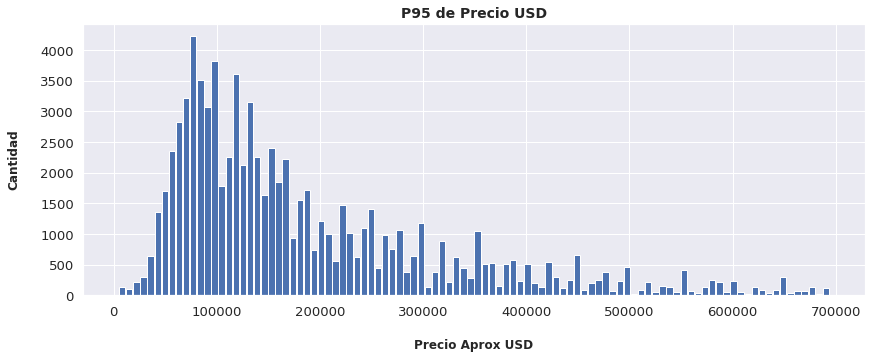

In [ ]:
properatti_data_wo_nan_price_p95_price = properatti_data.loc[properatti_data['price_aprox_usd'] 
                                   < properatti_data.price_aprox_usd.quantile(0.95)]

plt = properatti_data_wo_nan_price_p95_price.price_aprox_usd.plot.hist(grid=True,
                                           bins=100,
                                           rwidth=0.9,
                                           figsize=(14,5))

plt.set_title("P95 de Precio USD", weight='bold', size=14)
plt.set_xlabel("Precio Aprox USD", labelpad=20, weight='bold', size=12)
plt.set_ylabel("Cantidad", labelpad=20, weight='bold', size=12)


In [ ]:
properatti_data['price_aprox_usd'].mean()

240995.81844437387

Text(0, 0.5, 'Cantidad')

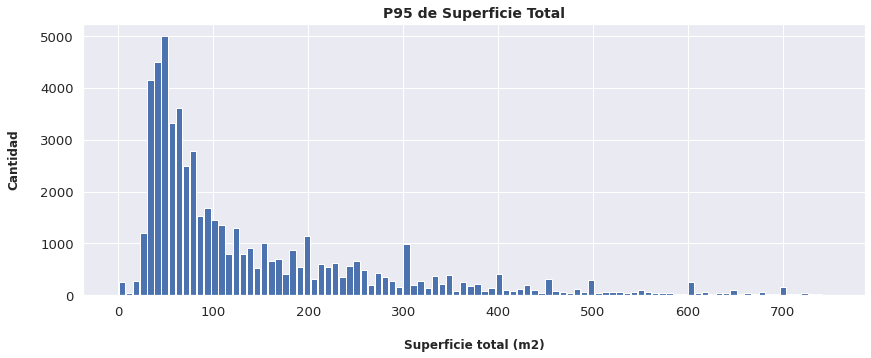

In [ ]:
properatti_data_wo_nan_price_p95_surf = properatti_data.loc[properatti_data['surface_total_in_m2'] 
                                   < properatti_data.surface_total_in_m2.quantile(0.95)]

plt = properatti_data_wo_nan_price_p95_surf.surface_total_in_m2.plot.hist(grid=True,
                                           bins=100,
                                           rwidth=0.9,
                                           figsize=(14,5))

plt.set_title("P95 de Superficie Total", weight='bold', size=14)
plt.set_xlabel("Superficie total (m2)", labelpad=20, weight='bold', size=12)
plt.set_ylabel("Cantidad", labelpad=20, weight='bold', size=12)


In [ ]:
properatti_data['surface_total_in_m2'].mean()

235.93120173051898

Text(0, 0.5, 'Cantidad de propiedades')

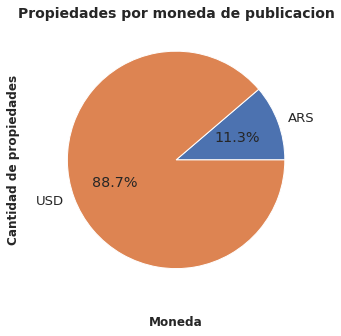

In [ ]:
#@title Cantidad de propiedades por moneda de publicacion
propiedades_por_moneda = properatti_data.groupby('currency')['title'].count()

plt = propiedades_por_moneda.plot.pie(y="currency", figsize=(14, 5), autopct='%1.1f%%')

plt.set_title("Propiedades por moneda de publicacion", weight='bold', size=14)
plt.set_xlabel("Moneda", labelpad=20, weight='bold', size=12)
plt.set_ylabel("Cantidad de propiedades", labelpad=20, weight='bold', size=12)

In [ ]:
#AA-Armar DataFrame para Graficar el % de Propiedades a la Venta por States

#Reemplazar valores de State_Name para corregir los que tienen simbolor extraños:
properatti_data.state_name = properatti_data.state_name.replace(['Buenos Aires Costa AtlÃ¡ntica', 'Entre RÃ\xados', 'CÃ³rdoba', 'NeuquÃ©n', 'RÃ\xado Negro', 'TucumÃ¡n'],
                      ['Buenos Aires Costa Atlantica', 'Entre Rios', 'Cordoba', 'Neuquen', 'Rio Negro','Tucuman'])


#Validacion de Estates Unicos:
properatti_data.state_name.unique()


#import seaborn as sns

List_State = properatti_data.state_name
counts = List_State.value_counts()
percent = List_State.value_counts(normalize=True)

#DataFrame con Totales y Porcentajes de 2 decimales por cada State
State_Porcentaje= pd.DataFrame({'Totales': counts, "per100": np.round((percent*100),2)})


#Se define una lista con States Unicos
State_distinct = List_State.unique()
States_Unique = State_distinct

#Se define una lista con Porcentaje de cada State
Porcentaje_State = State_Porcentaje.per100


#Se arma un Dataframe con Stados que tengan un Porcentaje Mayor a 1%
Mayor1 = State_Porcentaje['per100'] >=1
Df_SP_Sup1 = pd.DataFrame({'States': State_Porcentaje.loc[Mayor1, :].index, 'Porcentaje': State_Porcentaje.loc[Mayor1, :].per100})
Df_SP_Sup1


#Se arma un Dataframe con Stados que tengan un Porcentaje Menor a 1% y se suman para armar categoria "Otros"
Otros=['Otros']   
Menor1 = State_Porcentaje['per100'] <1
Df_SP_Inf1 = pd.DataFrame({'States': Otros, 'Porcentaje': State_Porcentaje.loc[Menor1, :].per100.sum()})
Df_SP_Inf1


#Concatenar los DataFrame
frames_Sup_Inf= [Df_SP_Sup1, Df_SP_Inf1]
result = pd.concat(frames_Sup_Inf)
Res_plot = result.sort_values('Porcentaje',ascending=False)
Res_plot




States  Porcentaje
Capital Federal                            Capital Federal       27.42
Bs.As. G.B.A. Zona Norte          Bs.As. G.B.A. Zona Norte       24.80
Bs.As. G.B.A. Zona Sur              Bs.As. G.B.A. Zona Sur       12.77
Buenos Aires Costa Atlántica  Buenos Aires Costa Atlántica        9.77
Córdoba                                            Córdoba        8.03
Bs.As. G.B.A. Zona Oeste          Bs.As. G.B.A. Zona Oeste        7.58
Santa Fe                                          Santa Fe        4.62
0                                                    Otros        3.03
Buenos Aires Interior                Buenos Aires Interior        1.97

In [ ]:
#AA-Grafico para Porcentaje de Propiedades a la Venta por States
#import plotly.express as px

plotly_df = px.data.gapminder()
fig = px.bar(plotly_df, x=Res_plot.States, y=Res_plot.Porcentaje,
             labels={'States': 'States', 
                     'Porcentajes': '% Porcentajes'}, height=400,  
             title="% de Propiedades a la Venta por States")


fig.show()


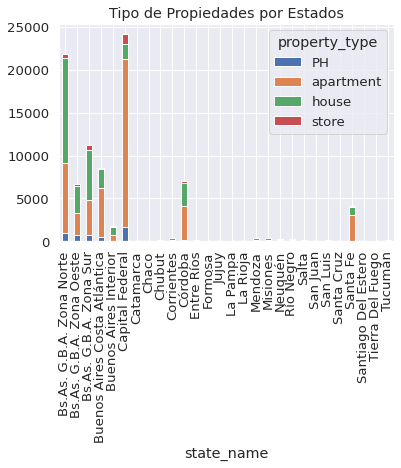

In [ ]:
#AA-Cantidad de Tipo de Propiedades por Estados

#Agrupacion de State_Name y Property_Type con sus respevtivos Totales
States_PropType = properatti_data.groupby(['state_name','property_type']).size()

#Se resetea los indices
States_PropType = States_PropType.reset_index()

#Se ordena por Totales
States_PropType2 = States_PropType.sort_values([0], ascending=False)

#Se valida Orden de Totales
States_PropType2

#Grafico
States_PropType2 = pd.pivot_table(States_PropType2, columns = 'property_type', index = 'state_name', 
                                  values = 0)

States_PropType2.plot(kind = 'bar', stacked = True, title='Tipo de Propiedades por Estados')


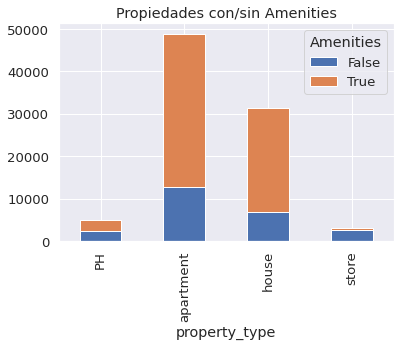

In [ ]:
#AA-Catidad de Propiedades con Amenities VS sin Amenities

#Se almacena total de propiedades agrupadas por Amenities y Tipo de Propiedad
Amenities_PropType = properatti_data.groupby(['Amenities','property_type']).size()

Amenities_PropType = Amenities_PropType.reset_index()

Amenities_PropType

Amenities_PropType = pd.pivot_table(Amenities_PropType, columns = 'Amenities', index = 'property_type', values = 0)

Amenities_PropType.plot(kind = 'bar', stacked = True, title= 'Propiedades con/sin Amenities')

In [ ]:
#AA-Casas con Jardin Y Pileta

#Se filtran solo las Casas
Casa = properatti_data[(properatti_data['property_type'] == 'house')]

#Del DataFrame de Solo Casas, se evalua cuales tienen Jardin Y Pileta
Casa_JP= ((Casa['Jardin'] == True) & (Casa['Pileta'] == True))

#Se hace reset de los indices
M = pd.DataFrame(Casa_JP.value_counts().reset_index())
#M

#False	38727
#True	1541

#Se cambian los valores True/False y se almacena en DataFrame con los totales
TF= ('No tiene Pileta, ni Jardin','Si Tiene Pileta y Jardin')
M = pd.DataFrame({'Condicion': TF, 'Total': Casa_JP.value_counts()})

M

#Grafico de Casas con Jardin y Pileta

#import plotly.express as px 

CPJ = px.data.iris() 
  
fig = px.pie(M, values='Total', 
             names='Condicion',  title = 'Casas con Jardin y Pileta',
             color_discrete_sequence=px.colors.sequential.Blugrn) 
fig.show()


In [ ]:
#AA-Departamentos con Amenities
Depa = properatti_data[(properatti_data['property_type'] == 'apartment')]

#Con Amenities
Depa_Amenities= (Depa['Amenities'] == True)

Dep_Am = pd.DataFrame(Depa_Amenities.value_counts().reset_index())

#Dep_Am
#True	45410
#False	25655

CA= ('Con Amenities','Sin Amenities')
G_DA = pd.DataFrame({'Condicion': CA, 'Total': Depa_Amenities.value_counts()})

G_DA

Condicion  Total
True   Con Amenities  36203
False  Sin Amenities  12639

In [ ]:
import plotly.express as px 
#Grafico con Departamentos con Amenities Vs sin Amenities

CPJ = px.data.iris() 
  
fig = px.pie(G_DA, values='Total', 
             names='Condicion',  title = 'Departamentos con Ameties',
             color_discrete_sequence=px.colors.sequential.Aggrnyl) 
fig.show()

In [ ]:
#AA-Comparativa de Promedio del precio de los Departamentos con Amenities vs sin Amenities
#Origen el Dataframe de Solo Departamento hecha anteriormente

#Se identifican los montos de price_aprox_usd nulos para no tomarlos en cuenta en el analisis
Montos_No_Nulos = Depa.price_aprox_usd.isnull() == False

Depa_Precio = pd.DataFrame(Depa[Montos_No_Nulos])

Depa_Precio

#Se calcula promedio de price_aprox_usd segun si tiene o no Amenities
Depa_Precio.groupby('Amenities')['price_aprox_usd'].mean()

#Se arma mask con Amenities y los precios
data_precio_usd = pd.DataFrame({'Amenities' : (Depa_Precio['Amenities']),'Precios': (Depa_Precio['price_aprox_usd'])})

Amenities_TF= ('Con Amenities','Sin Amenities')

#Se arma DataFrame con resultado de Condicion de Amenities y Precio Promedio con 2 decimales, ordenado descendiente.
Prom_Amenities_Depa = pd.DataFrame({'Condicion': Amenities_TF, 
                                    'Precio_Promedio_USD': data_precio_usd.groupby('Amenities')['Precios'].mean().round(2).sort_values(ascending=False)})


Prom_Amenities_Depa


Condicion  Precio_Promedio_USD
Amenities                                    
True       Con Amenities            205057.44
False      Sin Amenities            130138.72

In [ ]:
#import plotly.express as px

#Grafico de Precio Promedio USD de Depa Con vs Sin Amenities

Plotly_Prom_Amenities_Depa = px.data.gapminder()
fig = px.bar(Plotly_Prom_Amenities_Depa, x=Prom_Amenities_Depa.Condicion, y=Prom_Amenities_Depa.Precio_Promedio_USD,
             labels={'Condicion':'Tiene vs No tiene Amenities', 'Precio_Promedio_USD':'Precio Promedio USD'}, #No funcionan los Labels
             height=450, width = 600, 
             color_discrete_sequence=px.colors.qualitative.Bold,
             title="Precio Promedio USD de Depa Con vs Sin Amenities")

fig.show()

In [ ]:
#AA-Solo tomamos los valores menores a 1.000.000 
dpp = properatti_data[(properatti_data['price_aprox_usd']<1000000)]
#dpp

prom = dpp.groupby('state_name')['price_aprox_usd'].mean().round(2) #(normalize=True)
#prom

#DataFrame con Precio Promedio USD de 2 decimales por cada State
State_Prom_usd = pd.DataFrame({'State': prom.index, "Prom_usd": prom})

State_Prom_usd = State_Prom_usd.sort_values(['Prom_usd'], ascending=False)

State_Prom_usd

State   Prom_usd
state_name                                                           
Catamarca                                        Catamarca  306008.43
Jujuy                                                Jujuy  301584.44
San Juan                                          San Juan  299575.82
Bs.As. G.B.A. Zona Norte          Bs.As. G.B.A. Zona Norte  277283.35
Chubut                                              Chubut  230593.88
Capital Federal                            Capital Federal  228166.02
Corrientes                                      Corrientes  197266.41
Mendoza                                            Mendoza  192112.45
Neuquén                                            Neuquén  191611.78
Río Negro                                        Río Negro  189938.55
Bs.As. G.B.A. Zona Sur              Bs.As. G.B.A. Zona Sur  187709.52
Tierra Del Fuego                          Tierra Del Fuego  180246.76
Chaco                                                Chaco  178583.55
Santa Cruz                                      Santa Cruz  176129.51
Buenos Aires Interior                Buenos Aires Interior  170773.44
San Luis                                          San Luis  166266.88
Santiago Del Estero                    Santiago Del Estero  163428.39
Bs.As. G.B.A. Zona Oeste          Bs.As. G.B.A. Zona Oeste  157113.10
Buenos Aires Costa Atlántica  Buenos Aires Costa Atlántica  138751.67
Entre Ríos                                      Entre Ríos  129561.58
Córdoba                                            Córdoba  129385.96
Salta                                                Salta  124219.64
Misiones                                          Misiones  117293.01
Santa Fe                                          Santa Fe  113570.13
Tucumán                                            Tucumán  109274.14
La Pampa                                          La Pampa  105413.61
Formosa                                            Formosa   99377.56
La Rioja                                          La Rioja   60954.38

In [ ]:

plotly_df_prom_usd = px.data.gapminder()
fig = px.bar(plotly_df_prom_usd, x=State_Prom_usd.State, y=State_Prom_usd.Prom_usd,
             labels={'State': 'States', 
                     'Prom_usd': 'Precio Promedio USD'}, height=400,  
             title="Precio Promedio de Propiedades a la Venta por States")
#State_Prom_usd = pd.DataFrame({'State': prom.index, "Prom_usd": prom})

fig.show()

In [ ]:
geometria = gpd.points_from_xy(properatti_data.lon, properatti_data.lat)




In [ ]:
geo_arg = gpd.GeoDataFrame(properatti_data, geometry=geometria)
geo_arg.head(5)

operation property_type place_name country_name        lat        lon  \
0      sell            PH  Mataderos    Argentina -34.661824 -58.508839   
1      sell     apartment   La Plata    Argentina -34.903883 -57.964330   
2      sell     apartment  Mataderos    Argentina -34.652262 -58.522982   
3      sell            PH    Liniers    Argentina -34.647797 -58.516424   
4      sell     apartment     Centro    Argentina -38.002626 -57.549447   

      price currency                    state_name  price_aprox_usd  \
0   62000.0      USD               Capital Federal          62000.0   
1  150000.0      USD        Bs.As. G.B.A. Zona Sur         150000.0   
2   72000.0      USD               Capital Federal          72000.0   
3   95000.0      USD               Capital Federal          95000.0   
4   64000.0      USD  Buenos Aires Costa Atlántica          64000.0   

   surface_total_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
0                 55.0       1127.272727   1550.000000    NaN    NaN   
1                  NaN               NaN           NaN    NaN    NaN   
2                 55.0       1309.090909   1309.090909    NaN    NaN   
3                  NaN               NaN           NaN    NaN    NaN   
4                 35.0       1828.571429   1828.571429    NaN    NaN   

   expenses  \
0       NaN   
1       NaN   
2       NaN   
3       NaN   
4       NaN   

                                                                  description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PA...   
1  Venta de departamento en décimo piso al frente, a estrenar. Living come...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON ...   
3  PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso....   
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL,  AL CONTRAFRENTE, EDIF...   

                                                        title Escalera  \
0                          2 AMB TIPO CASA SIN EXPENSAS EN PB    False   
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37                   False   
2                    2 AMB 3ER PISO CON ASCENSOR APTO CREDITO    False   
3                                PH 3 amb. cfte. reciclado       False   
4         DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE    False   

  Baulera Iluminacion Jardin Ascensor Pileta Cochera Parrilla Laundry    SUM  \
0   False       False  False    False  False   False    False   False  False   
1   False       False  False    False  False    True    False   False  False   
2   False       False  False    False  False   False    False   False  False   
3   False       False  False    False  False   False    False   False  False   
4   False        True  False    False  False   False    False   False  False   

  Balcon  Amenities                     geometry  
0  False      False  POINT (-58.50884 -34.66182)  
1   True       True  POINT (-57.96433 -34.90388)  
2  False      False  POINT (-58.52298 -34.65226)  
3  False      False  POINT (-58.51642 -34.64780)  
4  False      False  POINT (-57.54945 -38.00263)

In [ ]:
plt.rcParams['figure.figsize'] = [8.0, 8.0]

AttributeError: ignored

In [ ]:
fig, ax = plt.subplot()
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Mapa de Argentina
ax = world[world.name == 'Argentina'].plot(color='white', edgecolor='black')

# Sobre las ciudades superpone el mapa del país
fig = geo_arg.plot(ax=ax, color='red')

f = plt.figure()
f.set_figwidth(4)
f.set_figheight(1)


# Mery